

# Project: Investigate a Dataset - [no_show_appointments.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

we will ask the following question to know which data affecting the showing of paitence


<li><a href="#Gender">Could Gender effect visiting rate?</a></li>

<li><a href="#Age">Could Age effect visiting rate?</a></li>

<li><a href="#chronic_diseases">Could chronic diseases effect visiting rate ?</a></li>

<li><a href="#sms">Could SmS services effect visiting rate ?</a></li>

<li><a href="#Neighbourhood">Could  Neighbourhood effect visiting rate ?</a></li>

<li><a href="#Scholarship">Could  Scholarship effect visiting rate ?</a></li>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#showing the shape of the dataframe
df.shape

(110527, 14)

the data frame has 110527 rows and 14 columns

In [4]:
#showing information of the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


the data has no nan items in the columns

In [5]:
#check if the there any duplicated values
df.duplicated().sum()

0

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


as we can see in the upper dataframe 
the average age of patients is 37 
while there is -1 in the age column that will be fixed in next steps

In [7]:
df[df.Age==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning

 

In [8]:
#we will delete any unreal values from age column
df=df[df.Age >=0]


In [9]:
#converting the dtype of ScheduledDay and AppointmentDay to datatime 
df['AppointmentDay']=pd.to_datetime(df.AppointmentDay)
df['ScheduledDay']=pd.to_datetime(df.ScheduledDay)

In [10]:
#checking the previous step
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [11]:
# renaming the NO-show to No_show to make analysis easier
df=df.rename(columns={'No-show':'No_show','Hipertension':'Hypertension'})

In [12]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [13]:
# droping columns that won't be useful for us in our Analysis
df=df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1)
df

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
show=df.No_show == "No"
noshow=df.No_show == "Yes"
df[show].mean()


Age             37.790504
Scholarship      0.093904
Hypertension     0.204394
Diabetes         0.073838
Alcoholism       0.030417
Handcap          0.022742
SMS_received     0.291337
dtype: float64

# <a id='eda'></a>
## Exploratory Data Analysis


# <a id='Gender'></a>
### Could Gender effect visiting rate? (Replace this header name!)

In [16]:
#showing no of people show based on there Gender
df.groupby('No_show').Gender.value_counts()

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

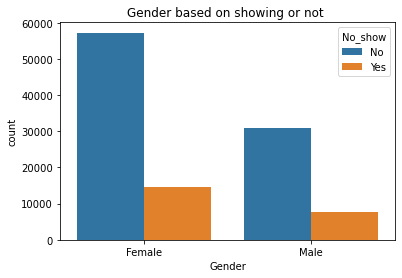

In [17]:
gender_effect=sb.countplot(x=df['Gender'], hue=df['No_show'] , data=df )
gender_effect.set_title('Gender based on showing or not ')
x_ticks_labels=['Female','Male']
gender_effect.set_xticklabels(x_ticks_labels);

from the upper plot we can see that gender is not the factor affecting visiting rate

# <a id='Age'></a>
### Could Age effect visiting rate?  (Replace this header name!)

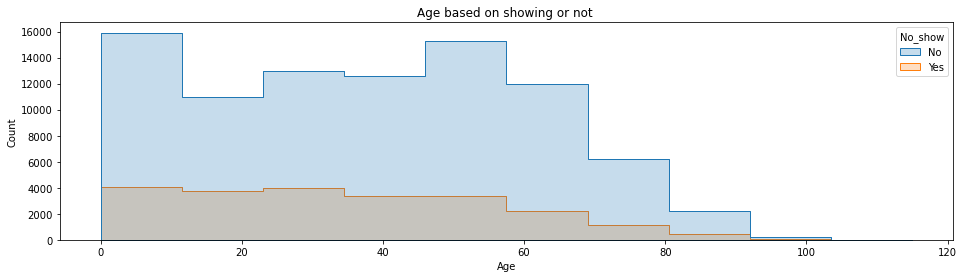

In [18]:
plt.figure(figsize=(16,4))
Age_effect=sb.histplot(x=df['Age'], hue=df['No_show'] , data=df,bins=10,element="step")
Age_effect.set_title('Age based on showing or not ')
plt.show()

the most showing ages are from 0 to 10 then old people from 40:55 years old
but the least showing people in the clinic are 65:115 years old 

# <a id='chronic_diseases'></a>
### Could chronic diseases effect visiting rate ?

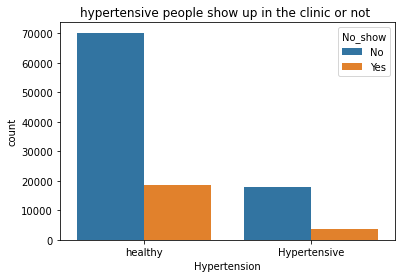

In [19]:
chronic_diseases=sb.countplot(data=df,hue='No_show',x=df.Hypertension)
chronic_diseases.set_title('hypertensive people show up in the clinic or not ')
x_ticks_labels=['healthy','Hypertensive']
chronic_diseases.set_xticklabels(x_ticks_labels);


we can see from the upper plot that hypertensive people are not showing as much as healthy people 

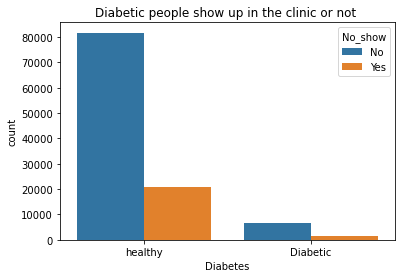

In [20]:
chronic_diseases_v2=sb.countplot(data=df,hue='No_show',x=df.Diabetes)
chronic_diseases_v2.set_title('Diabetic people show up in the clinic or not ')
x_ticks_labels=['healthy','Diabetic']
chronic_diseases_v2.set_xticklabels(x_ticks_labels);



we can see from the upper that Diabetic people are not showing as much as healthy people 

# <a id='sms'></a>
### Could SmS services effect visiting rate ?

In [21]:
df.groupby('No_show').SMS_received.value_counts()

No_show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

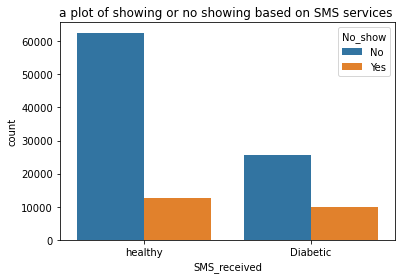

In [22]:
#making a plot by using seaborn and countplot 
#to count the no of people came after received an sms and no of came without receiving sms
sms_effect=sb.countplot(x=df['SMS_received'],hue=df['No_show'],data=df)
sms_effect.set_title('a plot of showing or no showing based on SMS services ')
x_ticks_labels=['healthy','Diabetic']
sms_effect.set_xticklabels(x_ticks_labels);

based on this data the number of people visit without being notifed i greater than people that been notifed , we need to update our sms services or cancel it and save the money 

# <a id='Neighbourhood'></a>
### Could  Neighbourhood effect visiting rate ?

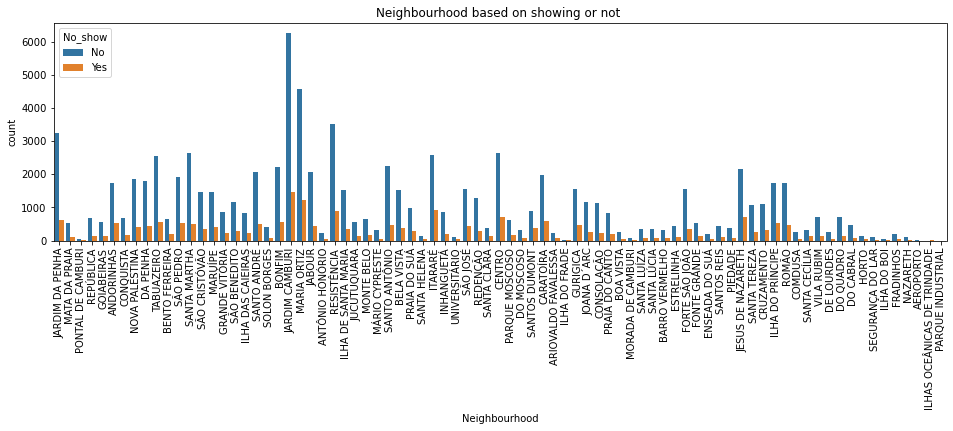

In [23]:
#creating a plot lib that show me that neighbourhoods and the visting rate from each neighbour
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
Neighbourhood_effect=sb.countplot(x=df['Neighbourhood'], hue=df['No_show'])
Neighbourhood_effect.set_title('Neighbourhood based on showing or not ')
plt.show()

as we can see from the data shown below that our most visited patiens are from jardim and maria ortiz
,we can open a branch in the middle of our lowest neighbourhhod visiting rates so we can higher our visiting rates

In [25]:
#creating a dataframe with the most higher neighbourhood
hb = df[df['Neighbourhood'].str.contains('JARDIM CAMBURI')]
hb.shape

(7717, 10)

In [26]:
#see the the ages in this neigbourhood
hb.groupby('Neighbourhood').Age.value_counts()

Neighbourhood   Age
JARDIM CAMBURI  49     202
                63     164
                61     162
                51     157
                52     157
                      ... 
                97       3
                91       2
                94       2
                95       2
                93       1
Name: Age, Length: 97, dtype: int64

In [27]:
hb.groupby('Neighbourhood').Age.value_counts()

Neighbourhood   Age
JARDIM CAMBURI  49     202
                63     164
                61     162
                51     157
                52     157
                      ... 
                97       3
                91       2
                94       2
                95       2
                93       1
Name: Age, Length: 97, dtype: int64

In [28]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

# <a id='Scholarship'></a>
### Could  Scholarship effect visiting rate ?

In [29]:
#showing the number of people that have scholarship and don't have scholarship
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [30]:
df.groupby('Scholarship').No_show.value_counts()

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

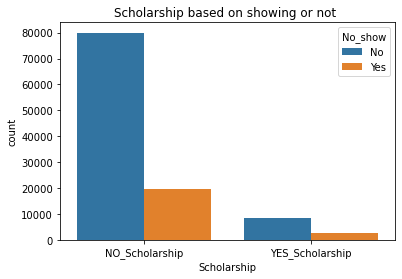

In [31]:
#Creating a plot showing us the scholarship and if it effect the rate of visiting to the clinic
Scholarship_effect=sb.countplot(x=df['Scholarship'], hue=df['No_show'] , data=df )
Scholarship_effect.set_title('Scholarship based on showing or not ')
x_ticks_labels=['NO_Scholarship','YES_Scholarship']
Scholarship_effect.set_xticklabels(x_ticks_labels);

we can see that almost 80% of the people that have the scholarship are shown in the clinic and that's a good indicator that the scholarship is effecting the rate showing up 

<a id='conclusions'></a>
## Conclusions

 the age of the patient effecting the showing rate of the patient we have seen in the visualization that the young people 0:10 and from 40:55 are the most showed patient
while the old people from 55:90 are the least showed patient

based on this data the number of people visit without being notifed i greater than people that been notifed , we need to update our sms services or cancel it and save the money 

we can see that almost 80% of the people that have the scholarship are shown in the clinic and that's a good indicator that the scholarship is effecting the rate showing up 

as we can see from the data shown below that our most visited patiens are from jardim and maria ortiz
,we can open a branch in the middle of our lowest neighbourhhod visiting rates so we can higher our visiting rates

### Limitations

there was no relation between showing and gender , chronic diseases

my visualizations by countplot only from one prespective which is shown or not shown 

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1